# Data Mining - Project

## Objective:
We will create a model to detect Fake news using Python.
Fake news refers to information content that is false, misleading or whose source cannot be verified.

## Make necessary imports:

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**fakenews.csv**: A full training dataset with the following attributes:

<ul>
    <li><b>id</b>: unique id for a news article</li>
    <li><b>title</b>: the title of a news article</li>
    <li><b>author</b>: author of the news article</li>
    <li><b>text</b>: the text of the article; could be incomplete</li>
    <li><b>label</b>: a label that marks the article as potentially unreliable</li>
    <li>1: real news</li>
    <li>0: fake news</li>
</ul>

In [91]:
data = pd.read_csv(r"C:\Users\parij\Desktop\M.Sc\DM\Project\Fake News Dataset\Fake News Detection Dataset\train.csv")
data.head()

,text;label
0,trump tell million american hurricane victim r...
1,new york cable provider altice acc network new...
2,japan dentsu get small fine overtime breach de...
3,little kid toxic stress solve priscilla chan c...
4,fantasy football kicker ranking week warn some...


In [92]:
l = []
for i in data['text;label']:
    t = i.split(';')
    l.append(t)
print(l)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [93]:
data = pd.DataFrame(l, columns = ['text', 'label'])
data.head()

,text,label
0,trump tell million american hurricane victim r...,0
1,new york cable provider altice acc network new...,0
2,japan dentsu get small fine overtime breach de...,1
3,little kid toxic stress solve priscilla chan c...,1
4,fantasy football kicker ranking week warn some...,0


## Data Cleaning and Preprocessing

Check the size of the dataframe/table as it would decide whether we can drop the rows with null values without
affecting the size of our dataset or not

In [94]:
data.shape

(3340, 2)

In [95]:
#Checking the total number of missing values in each of the columns.
data.isnull().sum()

text     0
label    0
dtype: int64

Since there are 1957 rows with missing values, hence we may need to delete these many rows, but it won't be ideal as we may lose almost 10% data. Hence we will fill cells with missing values with empty string

In [96]:
df = data.fillna('')
df.isnull().sum()

text     0
label    0
dtype: int64

In [97]:
df['label'].value_counts()

label
0    1670
1    1670
Name: count, dtype: int64

Now Let’s explore the unique values in the each category using below code.

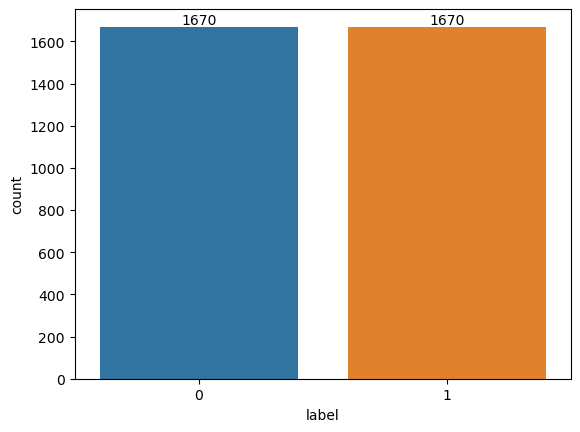

In [98]:
ax = sns.countplot(data=df,
              x='label',
              order=df['label'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**Stemming**

Now coming to the stemming part.

Stemming is a natural language processing technique that is used to reduce words to their base form, also known as the root form. The process of stemming is used to normalize text and make it easier to process. It is an important step in text pre-processing, and it is commonly used in information retrieval and text mining applications.

A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

There are several different algorithms for stemming. The Porter stemmer is the most widely used algorithm.

In [100]:
stemmer = PorterStemmer()

In [101]:
#Example
sentence = "Programmers program with programming languages"
stemmer.stem(sentence)

'programmers program with programming languag'

We create a new Porter stemmer for us so that we can use the function without explicitly typing PorterStemmer() every time.

In [102]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ', content) #1
    stemmed_content = stemmed_content.lower() #2
    stemmed_content = stemmed_content.split() #3
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #4
    stemmed_content = ' '.join(stemmed_content) #5
    return stemmed_content #6

**#1** First we use the **re** package and remove everything that is not a letter (lower or uppercase letters).

**#2** We then convert every uppercase letter to a lower one.

**#3** We then split the each sentence into a list of words.

**#4** Then we use the stemmer and stem each word which exists in the column and remove every english stopword present in the list.

**#5** We then join all these words which were present in the form of a list and convert them back into a sentence.

**#6** Finally we return the stemmed_content which has been preprocessed.

In [103]:
#Applying this function to our dataset,

df['text'] = df['text'].apply(stemming)
df['text'].head()

0    trump tell million american hurrican victim re...
1    new york cabl provid altic acc network new yor...
2    japan dentsu get small fine overtim breach des...
3    littl kid toxic stress solv priscilla chan ceo...
4    fantasi footbal kicker rank week warn someth b...
Name: text, dtype: object

In [104]:
df.head()

,text,label
0,trump tell million american hurrican victim re...,0
1,new york cabl provid altic acc network new yor...,0
2,japan dentsu get small fine overtim breach des...,1
3,littl kid toxic stress solv priscilla chan ceo...,1
4,fantasi footbal kicker rank week warn someth b...,0


In [105]:
df['label'] = [int(i) for i in df['label']]

Let’s visualize the WordCloud for fake and real news separately.

In [106]:
real_news = ' '.join(word for word in df['text'][df['label']==1].astype(str))
real_word_cloud = WordCloud(width = 1500, height = 750, random_state = 21, max_font_size = 110, collocations = False)

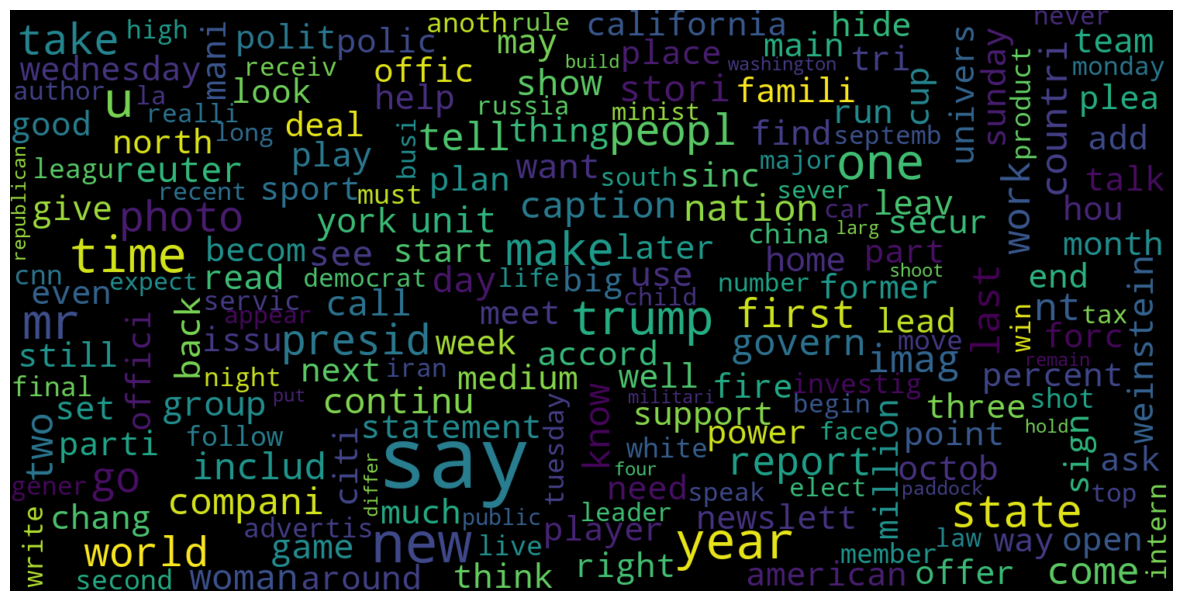

In [107]:
plt.figure(figsize = (15,10))
plt.imshow(real_word_cloud.generate(real_news), interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [108]:
fake_news = ' '.join(word for word in df['text'][df['label']==0].astype(str))
fake_word_cloud = WordCloud(width = 1500, height = 750, random_state = 21, max_font_size = 110, collocations = False)

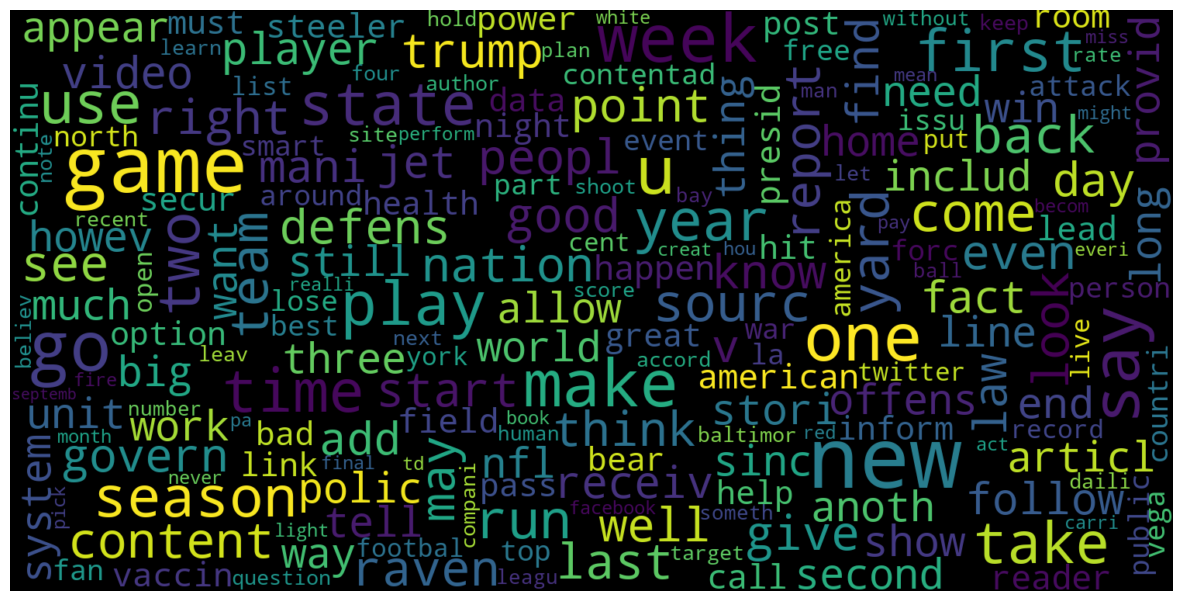

In [109]:
plt.figure(figsize = (15,10))
plt.imshow(fake_word_cloud.generate(fake_news), interpolation = 'bilinear')
plt.axis('off')
plt.show()

Let’s plot the bargraph of the top 20 most frequent words.

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

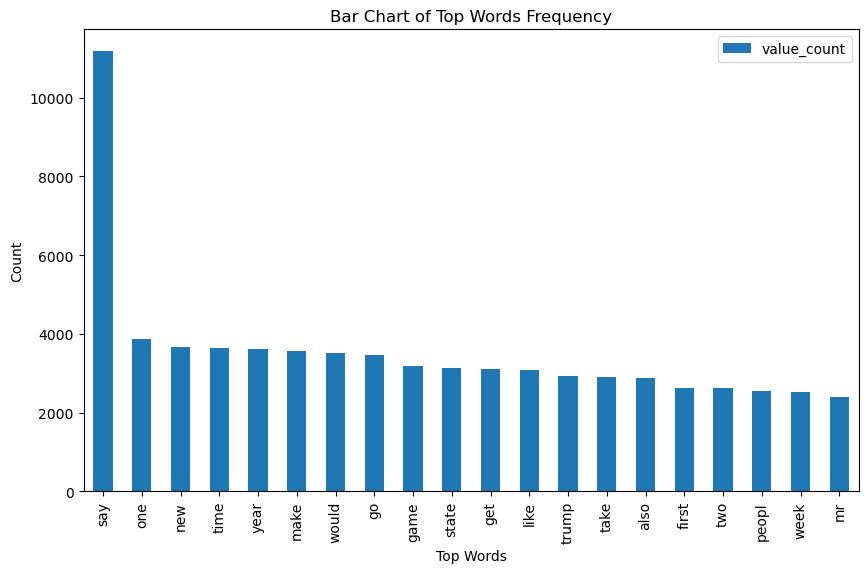

In [110]:
word_freq = {}
for i in range(len(df)):
    all_words = df['text'][i].split()
    for word in all_words:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] = word_freq[word] + 1

word_freq = sorted(word_freq.items(), key = lambda x:x[1], reverse=True)

i = 0
for word in word_freq:
    if len(word[0]) <= 1:
        word_freq.remove(word)
    i = i + 1

df1 = pd.DataFrame(word_freq, columns = ['value', 'value_count'])

df1[:20].set_index(df1['value'][:20]).plot(kind = 'bar',
         figsize=(10, 6),
         xlabel="Top Words",
         ylabel="Count",
         title="Bar Chart of Top Words Frequency"
        )

### Converting text into Vectors

In [111]:
#Next step is to name our input and output features

X = df.text.values
y = df.label.values

Our last preprocessing step would be to transform our textual X to numerical so that our ML model can understand it and can work with it. This is where **TfidfVectorizer** comes into play.

In [112]:
X = TfidfVectorizer().fit_transform(X)
print(X)

  (0, 32355)	0.32341711036646115
  (0, 13147)	0.08999567484915597
  (0, 27036)	0.08416346452977208
  (0, 18218)	0.29679569972187547
  (0, 7635)	0.17807933936068296
  (0, 6934)	0.14168475980111497
  (0, 9445)	0.10890200374421727
  (0, 27462)	0.0854329011123877
  (0, 30475)	0.09724546491883083
  (0, 22413)	0.09542736997193256
  (0, 19305)	0.07534435562021434
  (0, 4673)	0.12516524969712856
  (0, 30005)	0.07126775499198706
  (0, 243)	0.08516009830146191
  (0, 9467)	0.10051963132950095
  (0, 27686)	0.08492779974780469
  (0, 29000)	0.08439117217575502
  (0, 23374)	0.114061381624159
  (0, 23924)	0.35834930807394316
  (0, 31145)	0.28898393776179193
  (0, 13243)	0.3298160106583512
  (0, 1004)	0.3169691743373849
  (0, 18089)	0.32649004166359846
  (0, 28720)	0.251248424636233
  (0, 29790)	0.2015040940577648
  :	:
  (3339, 4822)	0.05640818245587454
  (3339, 22680)	0.26897720746417664
  (3339, 32924)	0.027038892569467607
  (3339, 12566)	0.03892985084283982
  (3339, 337)	0.026315291353960914
  (333

**Splitting the Dataset**

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

This means that we have divided our dataset into **80%** as training set and **20%** as test set. **stratify = y** implies that we have made sure that the division into train-test sets have around equal distribution of either classes (0 and 1 or Real and Fake). **random_state = 2** will guarantee that the split will always be the same.

### Training the Model

Fitting the model to our dataset using **Logistics Regression**

In [114]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

Now that we have trained it, let’s check the accuracy of our training set predictions

In [115]:
#Training set Accuracy
print(accuracy_score(y_train, model1.predict(X_train)))
#Testing set Accuracy
print(accuracy_score(y_test, model1.predict(X_test)))

0.9917664670658682
0.9745508982035929


So I got about **99%** for training dataset and **97%** for testing dataset, which is pretty good.

So test accuracy is also pretty good.

Now, Fitting the model to our dataset using **Decision Tree Classifier*

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
#Training set Accuracy
print(accuracy_score(y_train, model2.predict(X_train)))
#Testing set Accuracy
print(accuracy_score(y_test, model2.predict(X_test)))

1.0
0.9550898203592815


So I got about **100%** for training dataset and **95%** for testing dataset, which is pretty good.

**Building a system**

Finally to make this model useful we need to make a system. Taking a sample out of the test-set (I took the first sample)

In [119]:
X_sample = X_test[2]

In [120]:
y_test[2]

1

In [121]:
#Checking our prediction for this sample using logistics regression,

prediction = model1.predict(X_sample)
if prediction == 0:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Fake!


In [122]:
#Checking our prediction for this sample using Decision Tree Classifier,

prediction = model2.predict(X_sample)
if prediction == 0:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Fake!


# Conclusion

Decision Tree Classifier and Logistic regression are performing well.

# Author
Pari Vinod Chhoriya

Komal Bahadurge